# Demonstration: QCNN algorithm

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars

import sys
sys.path.insert(0, '../')
import vqe as vqe
import qcnn as qcnn
import losses as losses
import visualization as qplt
##############

In [2]:
myqcnn = qcnn.qcnn(vqe.load_vqe('../data/vqe_annni.pkl'), qcnn.qcnn_circuit, n_outputs = 2)

In [3]:
train_index = np.random.choice(np.arange(19), 19, replace = False)

In [4]:
myqcnn.train(1, 2000, train_index, losses.cross_entropy_multiclass, circuit=True, plot=False, inject = False)

+--- CIRCUIT ---+
0: ──||──||──RX(0.00)──RY(8.00)──╭C──RX(16.00)────────────────||─╭C─────────────────────────
1: ──||──||──RX(1.00)──RY(9.00)──╰X────────────╭C──RX(20.00)──||─╰ControlledOperation(24.00)
2: ──||──||──RX(2.00)──RY(10.00)─╭C──RX(17.00)─╰X─────────────||─╭C─────────────────────────
3: ──||──||──RX(3.00)──RY(11.00)─╰X────────────╭C──RX(21.00)──||─╰ControlledOperation(26.00)
4: ──||──||──RX(4.00)──RY(12.00)─╭C──RX(18.00)─╰X─────────────||─╭C─────────────────────────
5: ──||──||──RX(5.00)──RY(13.00)─╰X────────────╭C──RX(22.00)──||─╰ControlledOperation(28.00)
6: ──||──||──RX(6.00)──RY(14.00)─╭C──RX(19.00)─╰X─────────────||─╭C─────────────────────────
7: ──||──||──RX(7.00)──RY(15.00)─╰X──RX(23.00)────────────────||─╰ControlledOperation(30.00)

──╭C───────────────────────────||────────────────────────────────────────────────────||
──╰ControlledOperation(25.00)──||──RX(32.00)──RY(36.00)─╭C──RX(40.00)────────────────||
──╭C───────────────────────────||───────────────────────│────

Cost: 0.12687788903713226: 100%|███████████| 2000/2000 [00:18<00:00, 106.55it/s]


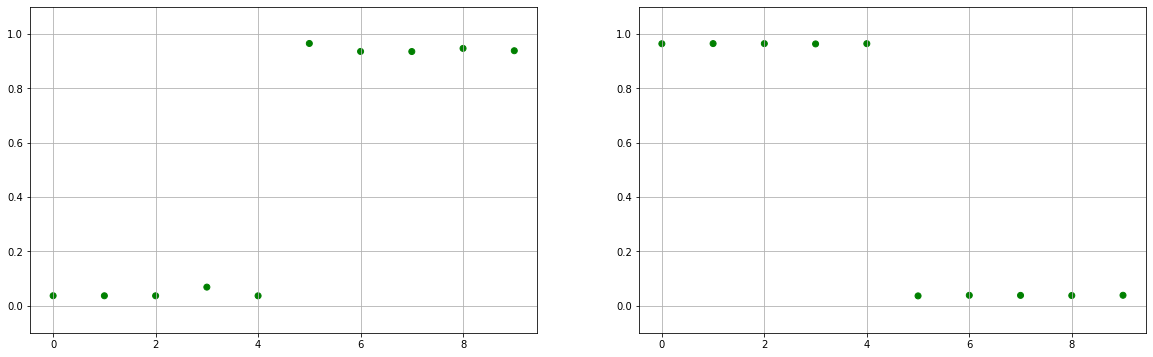

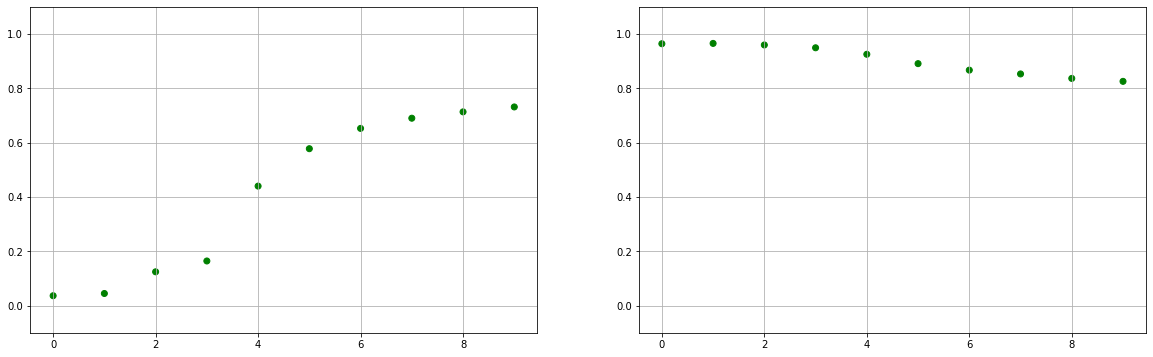

In [5]:
qplt.show_QCNN_classification2D(myqcnn)

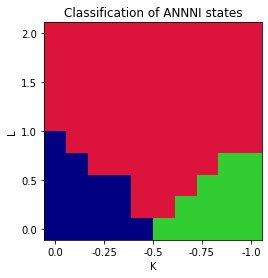

In [6]:
qplt.show_QCNN_classificationANNNI(myqcnn, inject = False)